# Transformer Value Error Fix

https://github.com/huggingface/transformers/issues/23340#issuecomment-1668870587

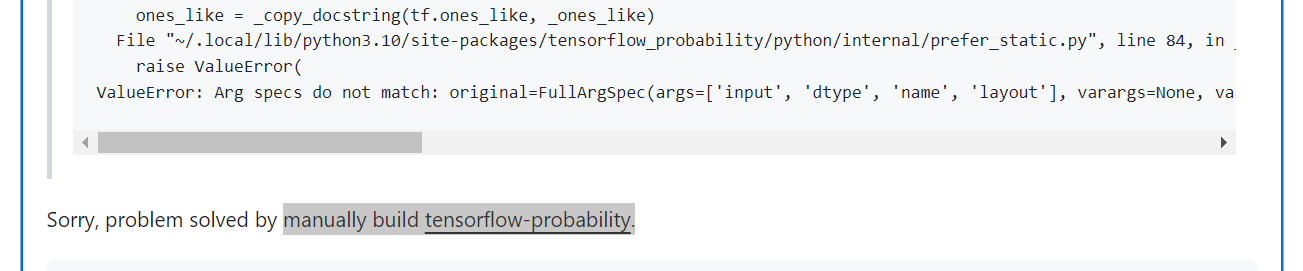

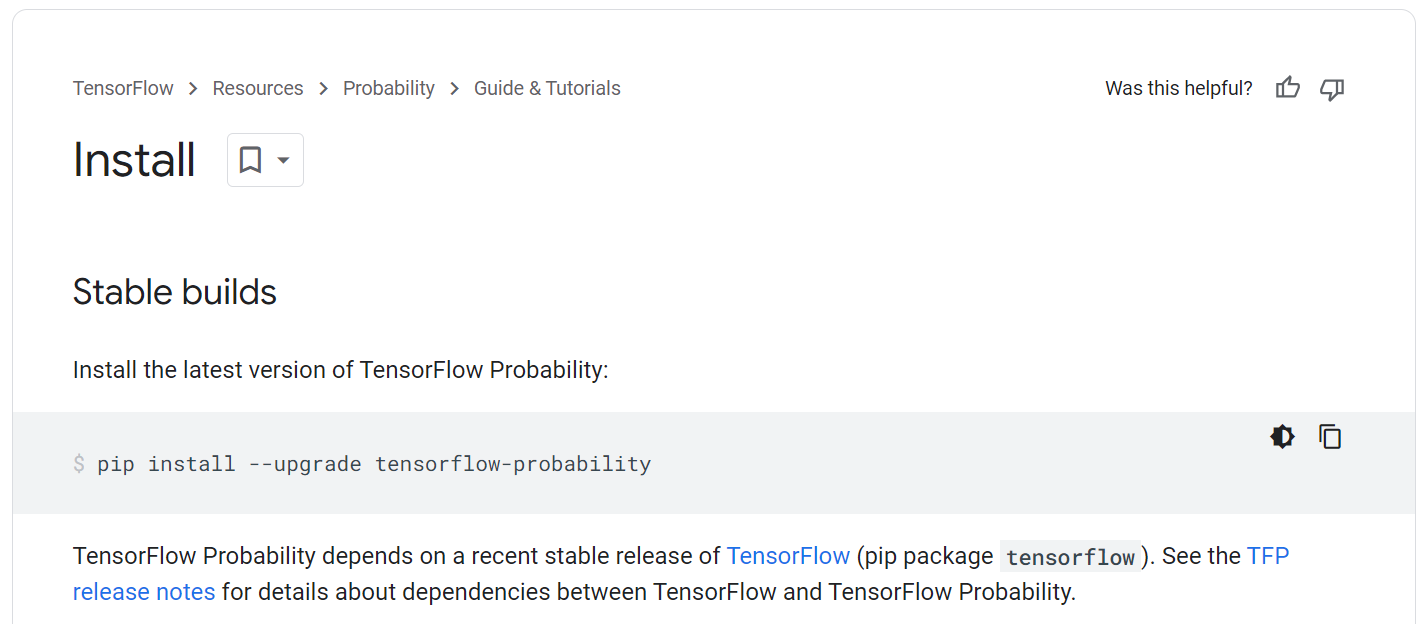

In [4]:
from transformers import pipeline
pipe = pipeline("text-generation", model="distilgpt2")

# If you want more control, you will need to define the tokenizer and model.
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained("distilgpt2")
model = AutoModelForCausalLM.from_pretrained("distilgpt2")

In [5]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598049521446228}]

In [6]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

There are **three main steps** involved when you pass some text to a pipeline:

The text is **preprocessed** into a format the model can understand.

The preprocessed inputs are **passed to the model**.

The predictions of the model are **post-processed**, so you can make sense of them.

Some of the currently available pipelines are:

1. feature-extraction (get the vector representation of a text)
2. fill-mask
3. ner (named entity recognition)
4. question-answering
5. sentiment-analysis
6. summarization
7. text-generation
8. translation
9. zero-shot-classification

## Zero-shot-classification

the zero-shot-classification pipeline is very powerful: it allows you to specify which labels to use for the classification

This pipeline is called zero-shot because you don’t need to fine-tune the model on your data to use it. It can directly return probability scores for any list of labels you want!

In [8]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [9]:
classifier ("This is a course about Transformers Library",
            candidate_labels = ["education", "business", "politics"])

{'sequence': 'This is a course about Transformers Library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.7974706888198853, 0.1429494470357895, 0.05957985296845436]}

## Named Entity Recognition

In [10]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True)
ner("My name is Lohith and I work for Adobe in Bengaluru")


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/home/dlvaayuai/anaconda3/envs/deep_lrnr/lib/python3.9/site-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'PER',
  'score': 0.9984076,
  'word': 'Lohith',
  'start': 11,
  'end': 17},
 {'entity_group': 'ORG',
  'score': 0.99925214,
  'word': 'Adobe',
  'start': 33,
  'end': 38},
 {'entity_group': 'LOC',
  'score': 0.9991593,
  'word': 'Bengaluru',
  'start': 42,
  'end': 51}]

This is why sharing language models is paramount: sharing the trained weights and building on top of already trained weights reduces the overall compute cost and carbon footprint of the community.

By the way, you can evaluate the carbon footprint of your models’ training through several tools. For example ML CO2 Impact or Code Carbon which is integrated in 🤗 Transformers. To learn more about this, you can read this blog post which will show you how to generate an emissions.csv file with an estimate of the footprint of your training, as well as the documentation of 🤗 Transformers addressing this topic.

ML CO2 Impact
https://mlco2.github.io/impact/

Code Carbon
https://codecarbon.io/

blog post
https://huggingface.co/blog/carbon-emissions-on-the-hub

documentation
https://huggingface.co/docs/hub/model-cards-co2

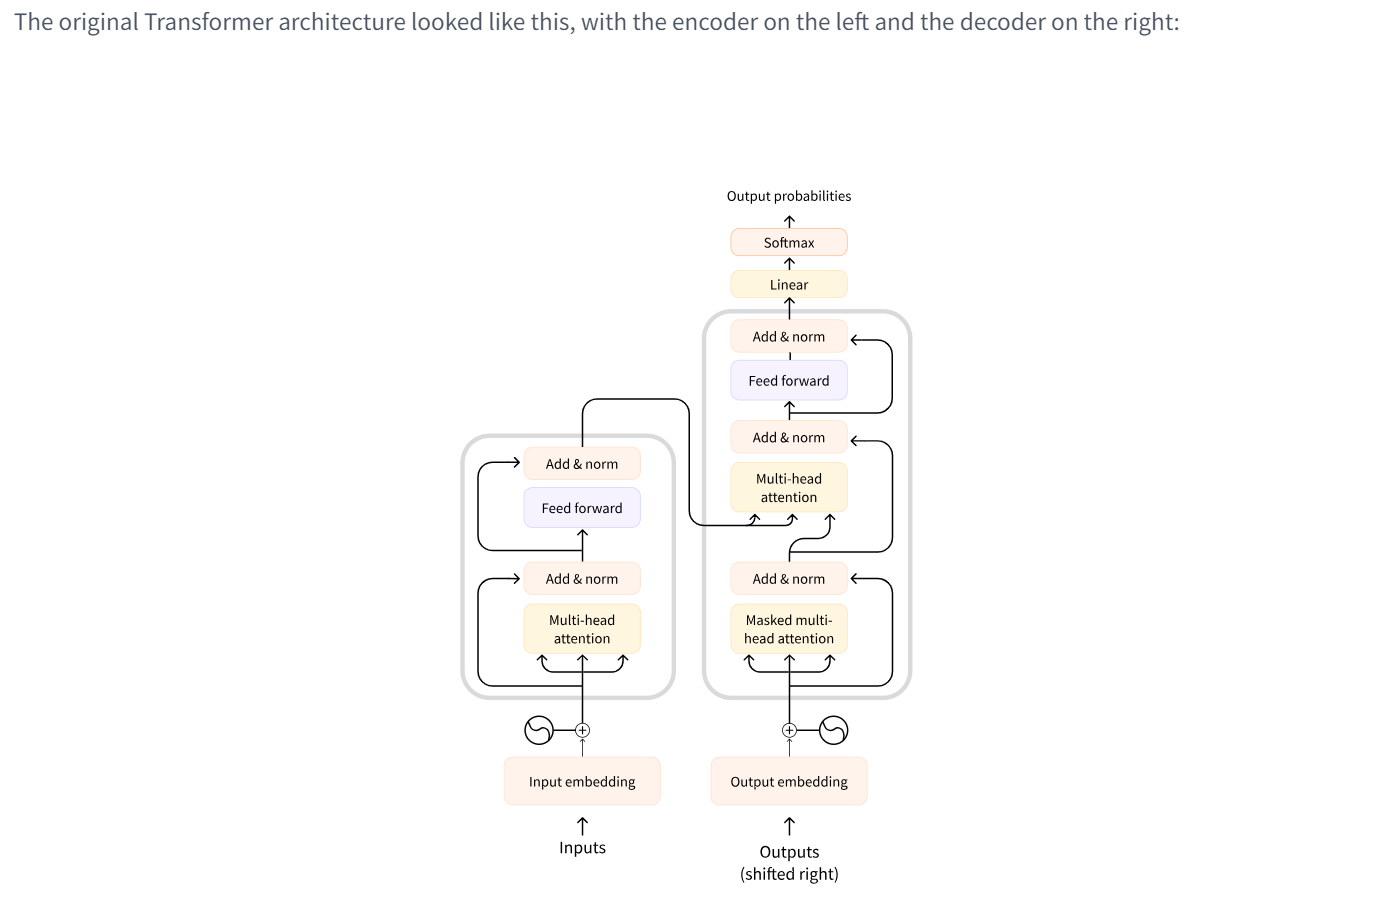

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [5]:
!pip3 install -q -U bitsandbytes==0.42.0
!pip3 install -q -U peft==0.8.2
!pip3 install -q -U trl==0.7.10
!pip3 install -q -U accelerate==0.27.1
!pip3 install -q -U datasets==2.17.0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu11 24.2.1 requires cupy-cuda11x>=12.0.0, which is not installed.
cudf-cu11 24.2.1 requires cuda-python<12.0a0,>=11.7.1, but you have cuda-python 12.3.0 which is incompatible.
dvc-data 3.13.0 requires fsspec>=2024.2.0, but you have fsspec 2023.10.0 which is incompatible.
dvc-objects 5.0.0 requires fsspec>=2024.2.0, but you have fsspec 2023.10.0 which is incompatible.
scmrepo 3.1.0 requires fsspec[tqdm]>=2024.2.0, but you have fsspec 2023.10.0 which is incompatible.


In [7]:
!pip3 install -q -U transformers==4.38.0

In [1]:
import os
import transformers
import torch
from datasets import load_dataset
from trl import SFTTrainer
from peft import LoraConfig
from transformers import AutoTokenizer, AutoModelForCausalLM
from transformers import BitsAndBytesConfig, GemmaTokenizer

2024-02-24 23:18:25.939298: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-24 23:18:25.939331: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-24 23:18:25.940284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-24 23:18:25.944868: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-24 23:18:26.602099: W tensorflow/compiler/tf2

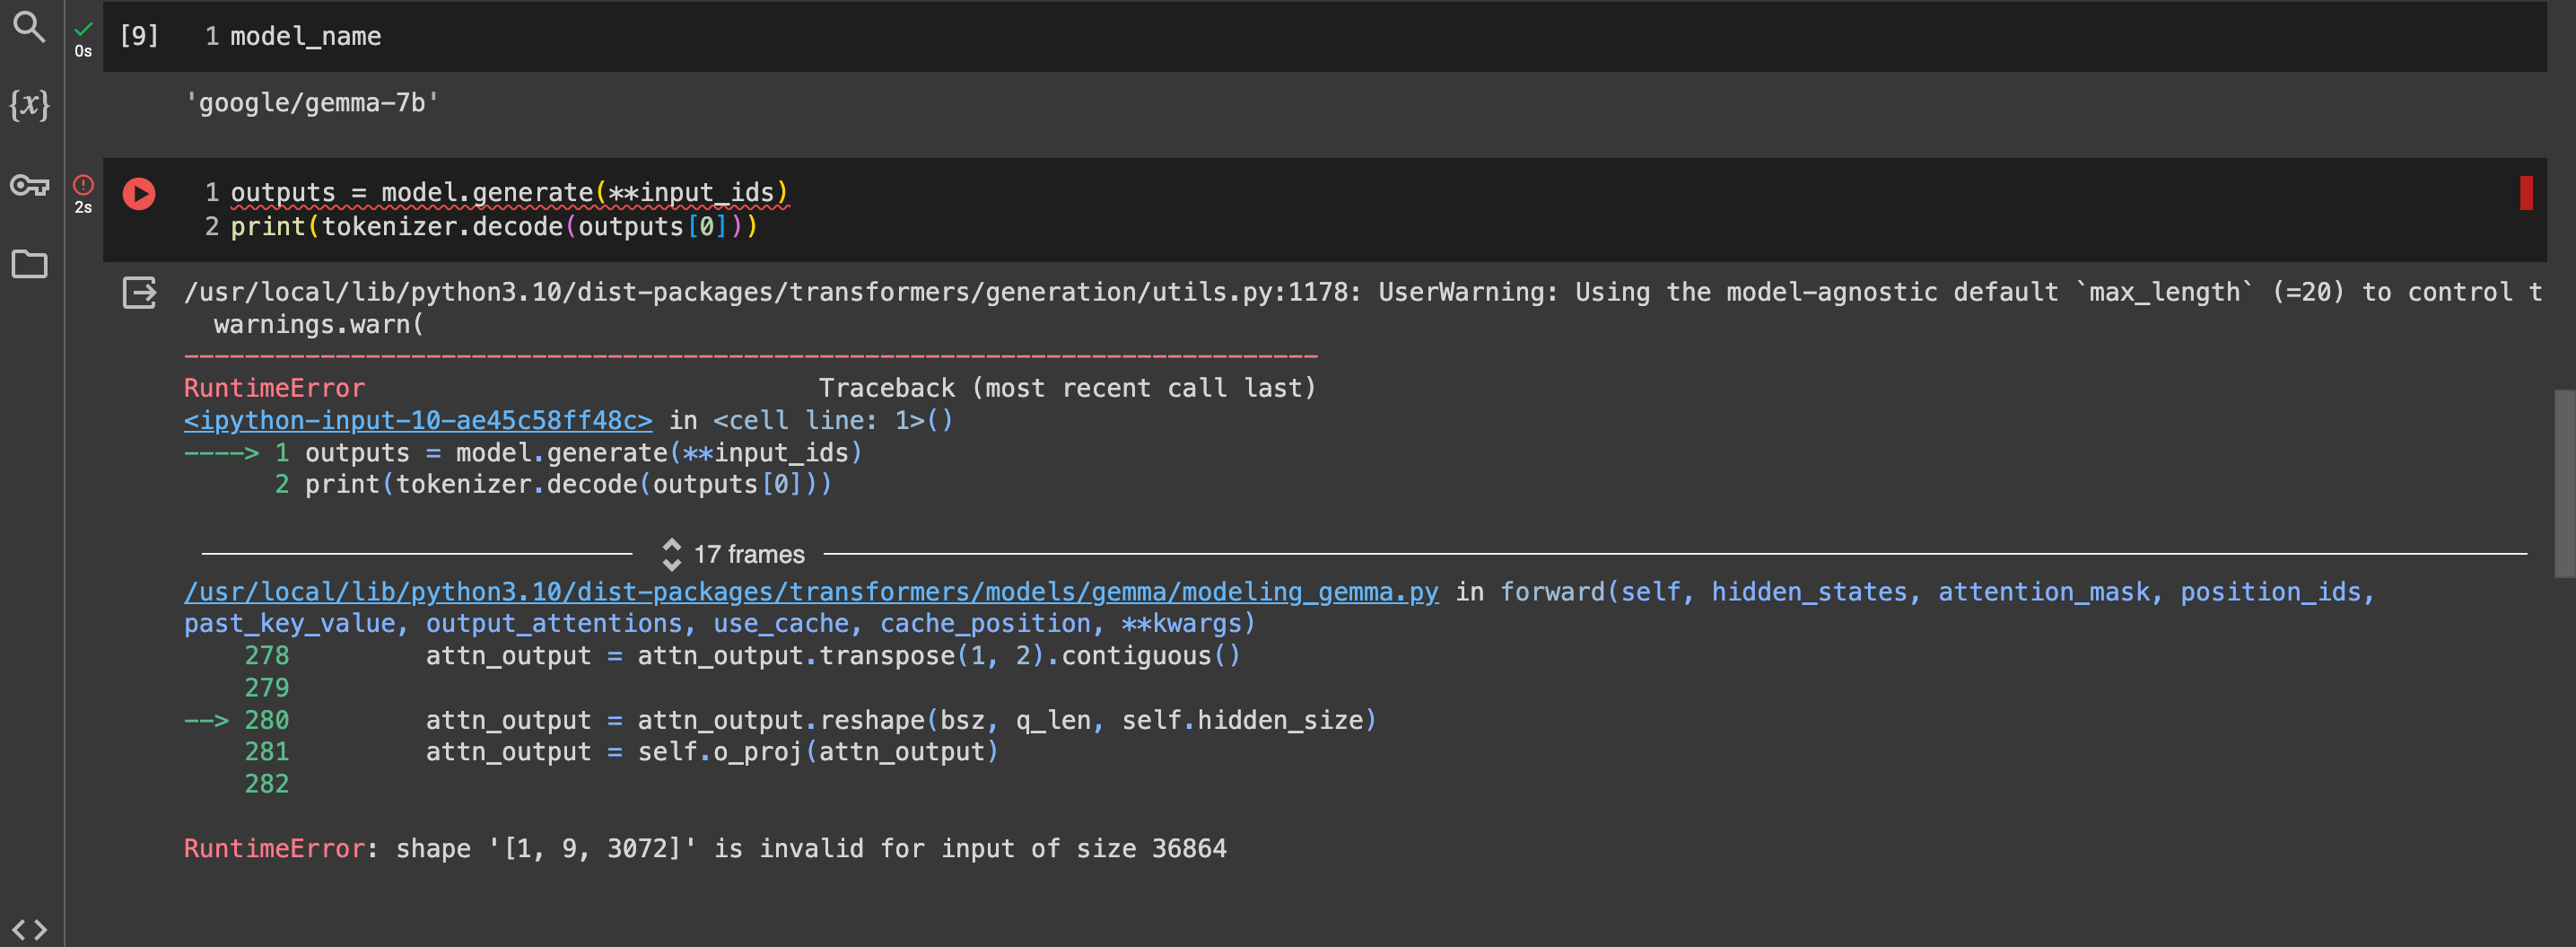

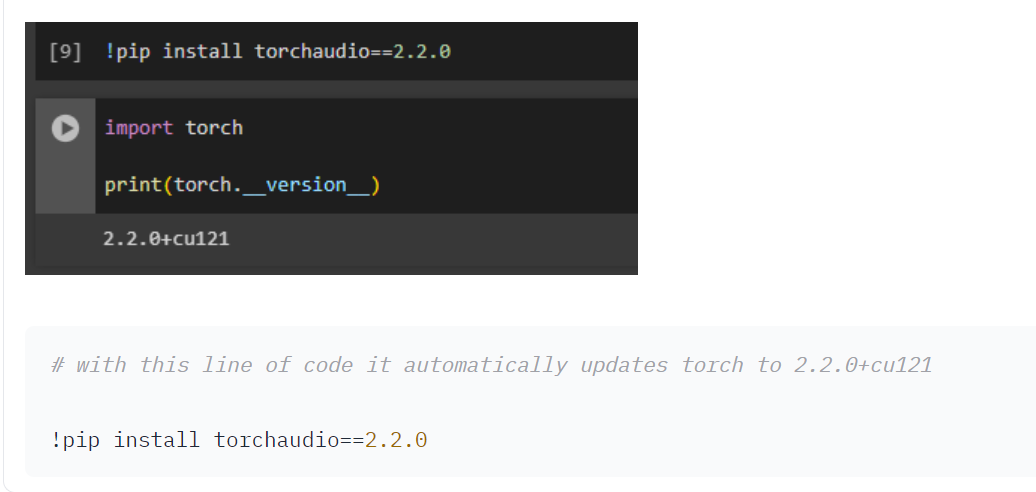

This has sorted the Gemma error 

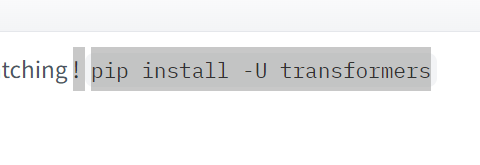

In [2]:
# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b")
model = AutoModelForCausalLM.from_pretrained("google/gemma-7b", device_map="auto")



Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [3]:
input_text = "Write me a poem about Machine Learning."
input_ids = tokenizer(input_text, return_tensors="pt").to("cuda")



In [8]:
outputs = model.generate(**input_ids, max_new_tokens=100)


In [7]:
print(tokenizer.decode(outputs[0]))

<bos>Write me a poem about Machine Learning.

I’m not a poet, but I’m a Machine Learning Engineer.

I’


In [9]:
import torch

In [10]:
print(torch.__version__)

2.0.1+cu117


Below is giving memory occupied by an model in GPU but with warning - Hence used other approach provided further below

In [13]:
import torch


# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)  # Move the model to GPU


# Specify batch size and input size
batch_size = 1  # Adjust batch size as needed
input_size = 512  # Adjust input size as needed

# Dummy input tensor
dummy_input = torch.randn(batch_size, input_size).to(device)

# Get the memory usage
print(torch.cuda.memory_allocated())


You shouldn't move a model when it is dispatched on multiple devices.


34696132608


**The below code provides details of the Memory occupied by the model in GPU**

In [14]:
import torch



# Get the current device of the model
device = next(model.parameters()).device

# Specify batch size and input size
batch_size = 1  # Adjust batch size as needed
input_size = 512  # Adjust input size as needed

# Dummy input tensor
dummy_input = torch.randn(batch_size, input_size).to(device)

# Get the memory usage
print(torch.cuda.memory_allocated())


34696132608


In [16]:
memory_allocated_bytes = 34696132608
memory_allocated_gb = memory_allocated_bytes / 1073741824
print("Memory allocated: {:.2f} GB".format(memory_allocated_gb))

Memory allocated: 32.31 GB


In [1]:
# pip install accelerate
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b-it")
model = AutoModelForCausalLM.from_pretrained("google/gemma-7b-it", device_map="auto")


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
chat = [
    { "role": "user", "content": "Write a streamlit program to provide interface to Gemini LLM models as chat with submit button and display the output from LLM" },
]
prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

In [15]:
prompt

'<bos><start_of_turn>user\nWrite a streamlit program to provide interface to Gemini LLM models as chat with submit button and display the output from LLM<end_of_turn>\n<start_of_turn>model\n'

In [16]:
inputs = tokenizer.encode(prompt, add_special_tokens=False, return_tensors="pt")

In [17]:
inputs

tensor([[    2,   106,  1645,   108,  5559,   476,  6249,  3087,  2733,   577,
          3658,  7222,   577, 86303,   629, 18622,  5377,   685,  9232,   675,
         12554,  6086,   578,  4953,   573,  5033,   774,   629, 18622,   107,
           108,   106,  2516,   108]])

In [18]:
outputs = model.generate(input_ids=inputs.to(model.device), max_new_tokens=2500)

In [19]:
outputs

tensor([[     2,    106,   1645,    108,   5559,    476,   6249,   3087,   2733,
            577,   3658,   7222,    577,  86303,    629,  18622,   5377,    685,
           9232,    675,  12554,   6086,    578,   4953,    573,   5033,    774,
            629,  18622,    107,    108,    106,   2516,    108,   1917,   7774,
            108,    809,   6249,   3087,    685,    680,    108,    809,   6599,
          10883,    109, 235345,  17284,    573,  86303,    629,  18622,   2091,
            108,   2516,    589,   6599,  10883, 235265,   1705, 235298,   2516,
            885, 175608, 235290,  13210, 235290,  14815, 235290,   2516,   1388,
            109, 235345,  32417,    573,   9232,   7222,    108,    490, 235265,
           2563,    885, 119825,    629,  18622,  15454,   1388,    108,   1529,
            589,    680, 235265,   1082, 235298,   2675,    885,   9836,    861,
           3969,  73950,    109, 235345,  43998,    573,   3969,    578,    947,
            573,    629,  18

In [20]:
print(tokenizer.decode(outputs[0]))

<bos><start_of_turn>user
Write a streamlit program to provide interface to Gemini LLM models as chat with submit button and display the output from LLM<end_of_turn>
<start_of_turn>model
```python
import streamlit as st
import pychat

# Load the Gemini LLM model
model = pychat.load_model("gemini-large-language-model")

# Define the chat interface
st.title("Gemini LLM Chat")
message = st.text_input("Enter your message:")

# Submit the message and get the LLM's response
if st.button("Submit"):
    response = model.generate_response(message)
    st.write("LLM's response:")
    st.write(response)
```

**Explanation:**

* The `streamlit` library is used to create the user interface.
* The `pychat` library is used to interact with the Gemini LLM model.
* The `load_model()` function is used to load the LLM model.
* The `text_input()` widget is used to get the user's message.
* The `button()` widget is used to submit the message.
* The `generate_response()` method is used to get the LLM's respo

In [21]:
text_output = tokenizer.decode(outputs[0])

In [22]:
file_path = "/home/dlvaayuai/storage/NLP_LP_V2/Huggingface_Transformers/output.txt"

# Open the file in write mode ("w")
with open(file_path, "w") as file:
    # Write the string to the file
    file.write(text_output)

In [9]:
output_from_model = tokenizer.decode(outputs[0])

# Split the output into lines
lines = output_from_model.strip().split('\n')

# Remove metadata tags and empty lines
cleaned_output = [line for line in lines if not (line.startswith('<') or line.strip() == '')]

# Join the lines to form the final output
formatted_output = '\n'.join(cleaned_output)

print(formatted_output)


Write a hello world program<end_of_turn>
```python
print("Hello, world!")
```
**Output:**
```
Hello, world!
```
**Explanation:**
* The `print` function is used to print the message to the console.
* The string "Hello, world!" is passed as an argument to the `print` function.
**Note:**
* This program will output the message "Hello, world!" to the console when it is executed.
* You can run this program using a Python interpreter or a Python script.<eos>


# ** SELF ATTENTION is a mechanism that can take static word embeddings and can generate contextual word embeddings**

In [24]:
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [25]:
!nvidia-smi

Failed to initialize NVML: Driver/library version mismatch
NVML library version: 535.161
